<a href="https://colab.research.google.com/github/jenilvekariya123/PROJECTS/blob/main/DS%26ML_(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
# Method 3: Relative path (if file is in same directory as script)
df = pd.read_csv("air_pollution_data.csv")

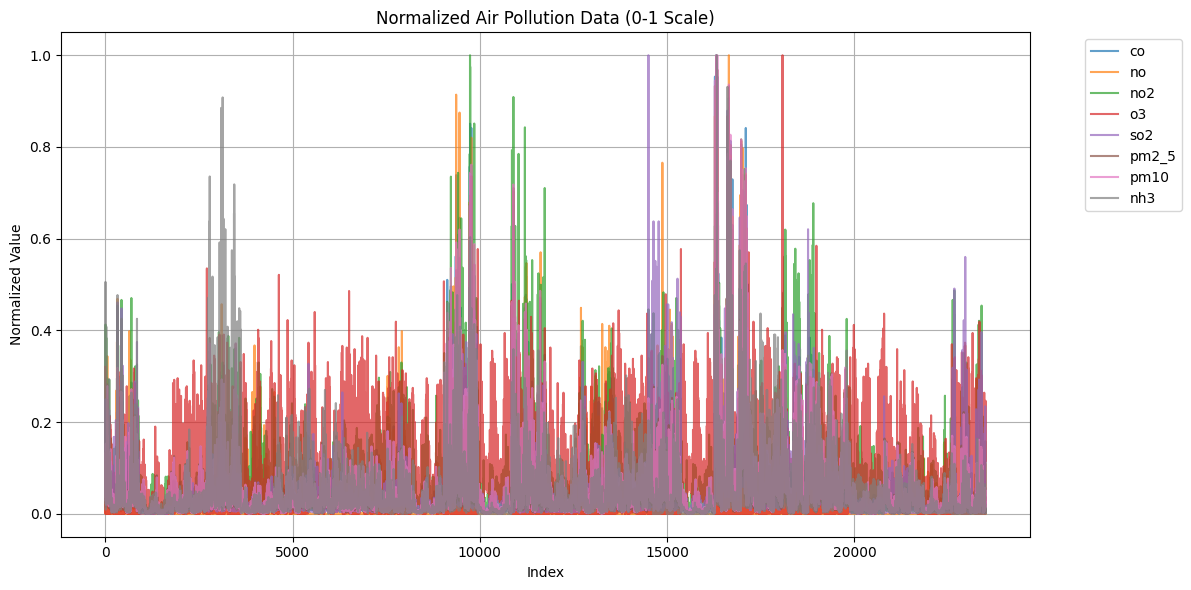


First 5 rows of normalized data:
        city        date  aqi        co        no       no2        o3  \
0  Ahmedabad  30-11-2020  1.0  0.015160  0.005199  0.048182  0.320427   
1  Ahmedabad  01-12-2020  1.0  0.065889  0.016843  0.164520  0.001797   
2  Ahmedabad  02-12-2020  1.0  0.071720  0.036132  0.147956  0.000418   
3  Ahmedabad  03-12-2020  1.0  0.092711  0.090812  0.120048  0.000000   
4  Ahmedabad  04-12-2020  1.0  0.088047  0.052254  0.176920  0.000049   

        so2     pm2_5      pm10       nh3  
0  0.107366  0.029713  0.029462  0.023708  
1  0.048630  0.054674  0.063392  0.077591  
2  0.053468  0.060357  0.070845  0.079746  
3  0.080417  0.068028  0.083000  0.103454  
4  0.063167  0.072758  0.084503  0.114940  

Normalized dataset saved as 'normalized_air_pollution_data.csv'


,city,date,aqi,co,no,no2,o3,so2,pm2_5,pm10,nh3
0,Ahmedabad,30-11-2020,1.00,0.015160,0.005199,0.048182,0.320427,0.107366,0.029713,0.029462,0.023708
1,Ahmedabad,01-12-2020,1.00,0.065889,0.016843,0.164520,0.001797,0.048630,0.054674,0.063392,0.077591
2,Ahmedabad,02-12-2020,1.00,0.071720,0.036132,0.147956,0.000418,0.053468,0.060357,0.070845,0.079746
3,Ahmedabad,03-12-2020,1.00,0.092711,0.090812,0.120048,0.000000,0.080417,0.068028,0.083000,0.103454
4,Ahmedabad,04-12-2020,1.00,0.088047,0.052254,0.176920,0.000049,0.063167,0.072758,0.084503,0.114940
...,...,...,...,...,...,...,...,...,...,...,...
23499,Visakhapatnam,21-05-2023,0.50,0.007872,0.000000,0.005340,0.246486,0.008862,0.016809,0.019151,0.000227
23500,Visakhapatnam,22-05-2023,0.50,0.009038,0.000000,0.010439,0.204224,0.011033,0.014376,0.017648,0.004934
23501,Visakhapatnam,23-05-2023,0.50,0.009475,0.000000,0.011978,0.197184,0.011304,0.016119,0.019551,0.003403
23502,Visakhapatnam,24-05-2023,0.50,0.005539,0.000000,0.003168,0.235902,0.004567,0.013468,0.019893,0.000000


In [2]:
from sklearn.preprocessing import MinMaxScaler
import pandas as pd
import matplotlib.pyplot as plt

# Load your dataset (replace with your actual data loading)
# df = pd.read_csv("your_dataset.csv")

# Normalization (0 to 1)
num_cols = df.select_dtypes(include=['number']).columns
scaler = MinMaxScaler()
df_normalized = df.copy()  # Create a copy to preserve original data
df_normalized[num_cols] = scaler.fit_transform(df[num_cols])

# Visualization
plt.figure(figsize=(12, 6))
for col in num_cols[1:11]:  # Plot first 5 numeric columns for clarity
    plt.plot(df_normalized[col], label=col, alpha=0.7)
plt.title('Normalized Air Pollution Data (0-1 Scale)')
plt.xlabel('Index')
plt.ylabel('Normalized Value')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()

# Display first 5 rows of normalized data
print("\nFirst 5 rows of normalized data:")
print(df_normalized.head())

# Save normalized data to new CSV
df_normalized.to_csv('normalized_air_pollution_data.csv', index=False)
print("\nNormalized dataset saved as 'normalized_air_pollution_data.csv'")

# Return the normalized dataframe
df_normalized

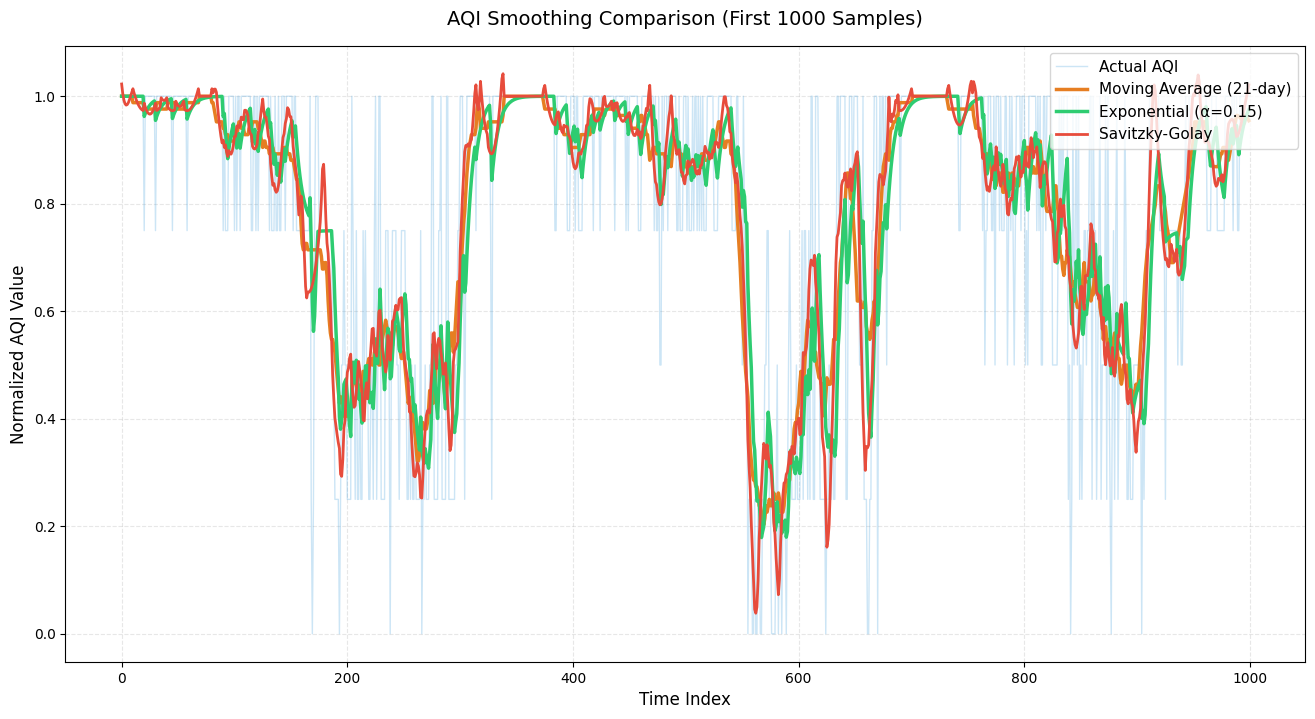

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.signal import savgol_filter

# Use first 1000 points
sample_size = 1000
df_sample = df_normalized.head(sample_size).copy()

# Smoothing parameters
window_size = 21  # Larger window for cleaner smoothing
alpha = 0.15      # Stronger smoothing factor

# Calculate smoothed versions
df_sample['Smoothed_MA'] = df_sample['aqi'].rolling(window=window_size, center=True, min_periods=1).mean()
df_sample['Smoothed_EWM'] = df_sample['aqi'].ewm(alpha=alpha, adjust=False).mean()
df_sample['Reconstructed_SG'] = savgol_filter(df_sample['aqi'],
                                           window_length=window_size,
                                           polyorder=3)

# Create figure
plt.figure(figsize=(16, 8))

# Plot settings
plt.plot(df_sample['aqi'], color='#3498db', alpha=0.25, linewidth=1, label='Actual AQI')
plt.plot(df_sample['Smoothed_MA'], color='#e67e22', linewidth=2.5, label=f'Moving Average ({window_size}-day)')
plt.plot(df_sample['Smoothed_EWM'], color='#2ecc71', linewidth=2.5, label=f'Exponential (α={alpha})')
plt.plot(df_sample['Reconstructed_SG'], color='#e74c3c', linewidth=2, label='Savitzky-Golay')

# Formatting
plt.title(f'AQI Smoothing Comparison (First {sample_size} Samples)', fontsize=14, pad=15)
plt.xlabel('Time Index', fontsize=12)
plt.ylabel('Normalized AQI Value', fontsize=12)
plt.legend(fontsize=11, loc='upper right')
plt.grid(True, linestyle='--', alpha=0.3)


# Save sample data
df_sample.to_csv('aqi_smoothing_sample.csv', index=False)

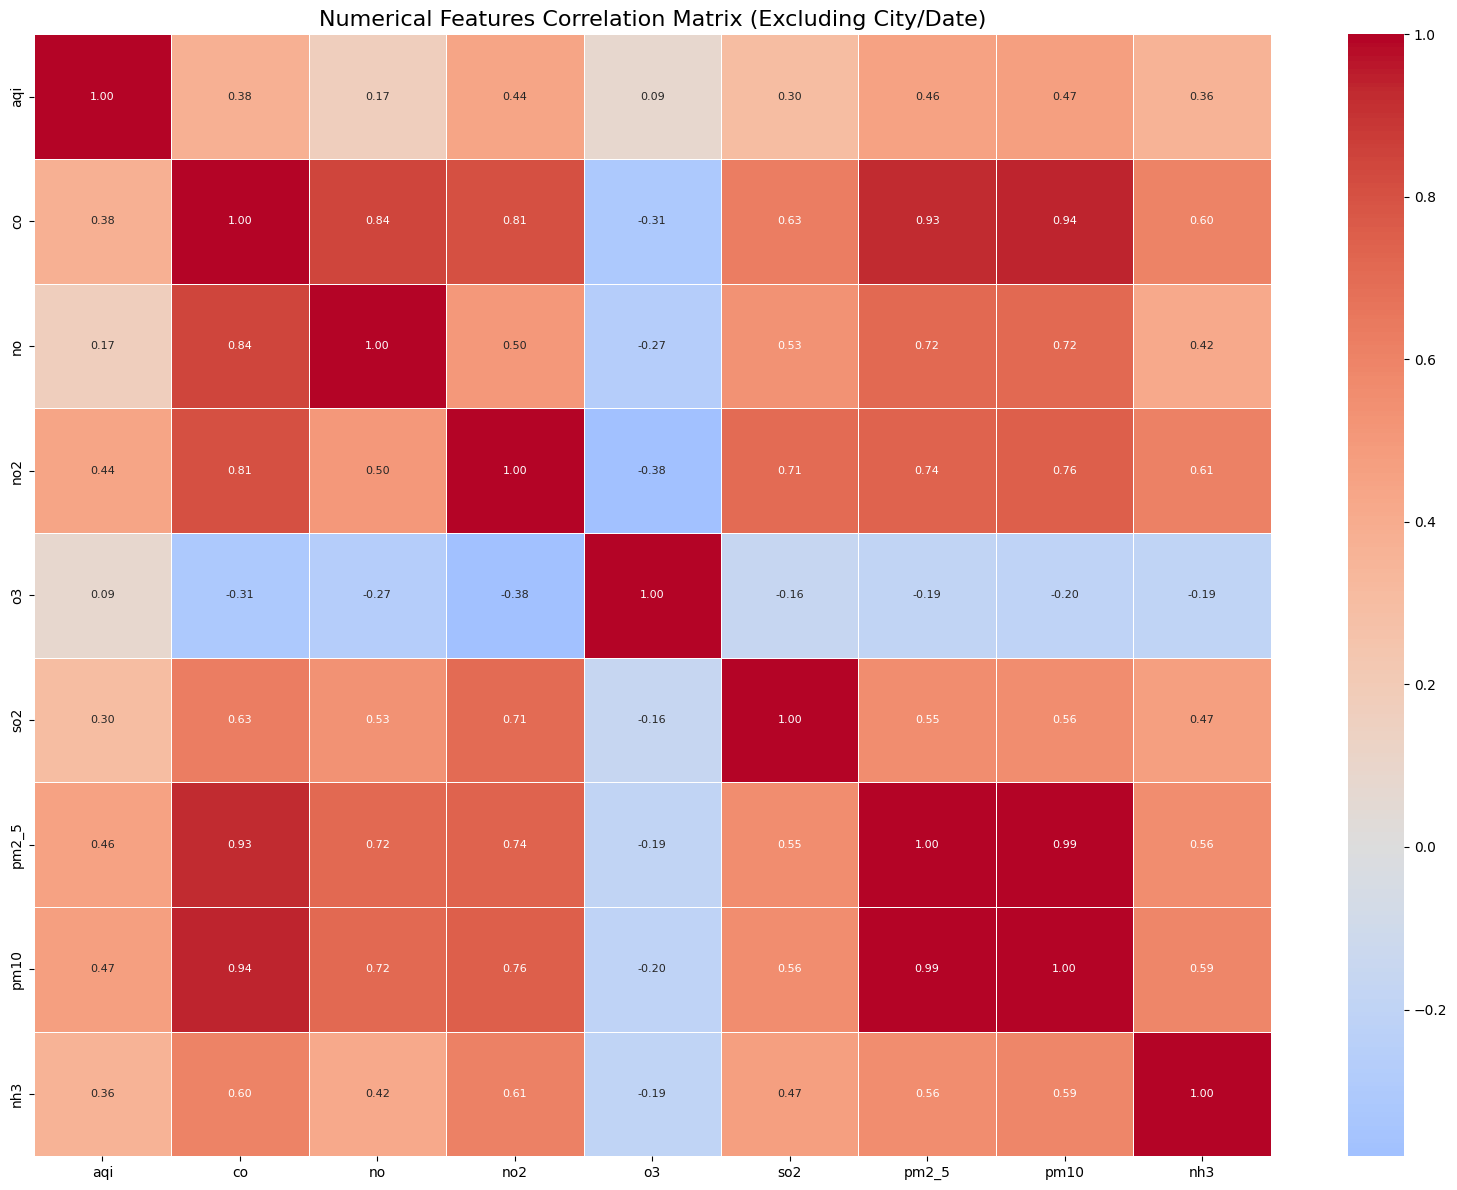

In [5]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Exclude non-numerical columns
numerical_cols = [col for col in df_normalized.columns
                 if col.lower() not in ['city', 'date'] and df_normalized[col].dtype in ['float64', 'int64']]

df_numerical = df_normalized[numerical_cols]

# Calculate correlation matrix
corr_matrix = df_numerical.corr()

# Visualize correlation matrix
plt.figure(figsize=(16, 12))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm',
            center=0, linewidths=0.5, annot_kws={"size": 8})
plt.title('Numerical Features Correlation Matrix (Excluding City/Date)', fontsize=16)
plt.tight_layout()
plt.show()

In [6]:
# Set threshold for high correlation
threshold = 0.85

# Find highly correlated features
high_corr = set()
for i in range(len(corr_matrix.columns)):
    for j in range(i):
        if abs(corr_matrix.iloc[i, j]) > threshold:
            colname = corr_matrix.columns[i]
            high_corr.add(colname)

print(f"Highly correlated numerical features (threshold={threshold}):")
print(high_corr)

# Create reduced dataset (keeping city and date)
cols_to_keep = [col for col in df_normalized.columns if col not in high_corr]
df_reduced_corr = df_normalized[cols_to_keep]

print("\nRemaining features after reduction:")
print(df_reduced_corr.columns.tolist())

Highly correlated numerical features (threshold=0.85):
{'pm10', 'pm2_5'}

Remaining features after reduction:
['city', 'date', 'aqi', 'co', 'no', 'no2', 'o3', 'so2', 'nh3']


In [7]:
# Save reduced dataset (including city and date if they existed)
df_reduced_corr.to_csv('crr_reduced_data.csv', index=False)
print("\nFinal reduced dataset saved as 'crr_reduced_data.csv'")
print(f"Original features: {len(df_normalized.columns)}")
print(f"Reduced features: {len(df_reduced_corr.columns)}")


Final reduced dataset saved as 'crr_reduced_data.csv'
Original features: 11
Reduced features: 9


# SVM **MODEL**

In [4]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc
import matplotlib.pyplot as plt
from sklearn.preprocessing import label_binarize

# Load the dataset
data = pd.read_csv('crr_reduced_data.csv')

# Convert AQI to binary classification (good/bad)
# Assuming: good (0) = AQI ≤ 100, bad (1) = AQI > 100
data['air_quality'] = np.where(data['aqi'] <= 0.5, 0, 1)  # Since normalized 0-1, 0.5 represents 100 AQI

# Features and target
X = data[['co', 'no', 'no2', 'o3', 'so2', 'nh3']]
y = data['air_quality']

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [5]:
# Initialize SVM classifier
svm_model = SVC(kernel='rbf', C=1.0, gamma='scale', probability=True, random_state=42)

# Train the model
svm_model.fit(X_train, y_train)

SVC(probability=True, random_state=42)

In [6]:
# Predictions
y_pred = svm_model.predict(X_test)
y_prob = svm_model.predict_proba(X_test)[:, 1]  # Probabilities for ROC curve

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

# Classification Report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Confusion Matrix:
[[1490  505]
 [ 293 4764]]

Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.75      0.79      1995
           1       0.90      0.94      0.92      5057

    accuracy                           0.89      7052
   macro avg       0.87      0.84      0.86      7052
weighted avg       0.88      0.89      0.88      7052



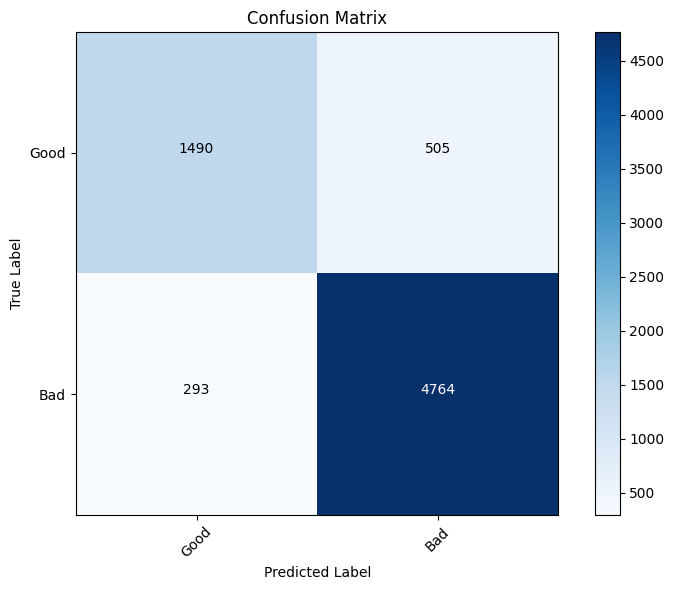

In [7]:
plt.figure(figsize=(8, 6))
plt.imshow(conf_matrix, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
tick_marks = np.arange(2)
plt.xticks(tick_marks, ['Good', 'Bad'], rotation=45)
plt.yticks(tick_marks, ['Good', 'Bad'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')

# Add text annotations
thresh = conf_matrix.max() / 2.
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        plt.text(j, i, format(conf_matrix[i, j], 'd'),
                 horizontalalignment="center",
                 color="white" if conf_matrix[i, j] > thresh else "black")

plt.tight_layout()
plt.show()

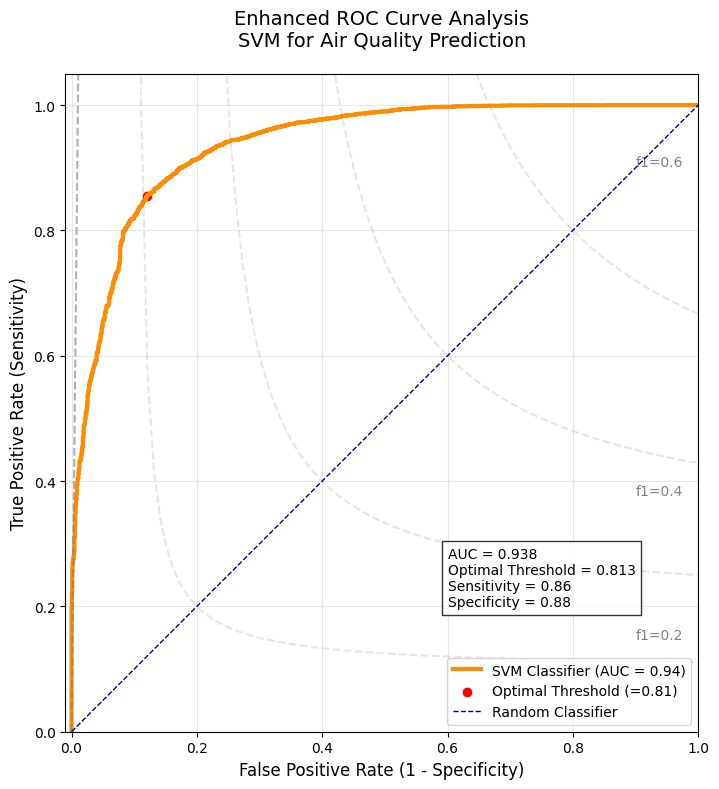

In [8]:
from sklearn.metrics import RocCurveDisplay, roc_curve, auc

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

# Create enhanced ROC curve plot
plt.figure(figsize=(10, 8))

# Plot ROC curve with more details
roc_display = RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc,
                             estimator_name='SVM Classifier')
roc_display.plot(ax=plt.gca(), color='darkorange', lw=3)

# Add important thresholds points
optimal_idx = np.argmax(tpr - fpr)
optimal_threshold = thresholds[optimal_idx]
plt.scatter(fpr[optimal_idx], tpr[optimal_idx], marker='o', color='red',
            label=f'Optimal Threshold (={optimal_threshold:.2f})')

# Add iso-f1 curves
x = np.linspace(0, 1, 100)
for f_score in [0.2, 0.4, 0.6, 0.8]:
    y = f_score * x / (2 * x - f_score)
    plt.plot(x[y >= 0], y[y >= 0], color='gray', alpha=0.2, linestyle='--')
    plt.annotate(f'f1={f_score:.1f}', xy=(0.9, y[45] + 0.02), alpha=0.5)

# Add diagonal and decorate
plt.plot([0, 1], [0, 1], color='navy', lw=1, linestyle='--', label='Random Classifier')
plt.xlim([-0.01, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (1 - Specificity)', fontsize=12)
plt.ylabel('True Positive Rate (Sensitivity)', fontsize=12)
plt.title('Enhanced ROC Curve Analysis\nSVM for Air Quality Prediction', fontsize=14, pad=20)
plt.legend(loc="lower right", fontsize=10)
plt.grid(True, alpha=0.3)

# Add performance metrics box
metrics_text = (f'AUC = {roc_auc:.3f}\n'
                f'Optimal Threshold = {optimal_threshold:.3f}\n'
                f'Sensitivity = {tpr[optimal_idx]:.2f}\n'
                f'Specificity = {1-fpr[optimal_idx]:.2f}')
plt.text(0.6, 0.2, metrics_text, bbox=dict(facecolor='white', alpha=0.8),
         fontsize=10)

plt.tight_layout()
plt.show()

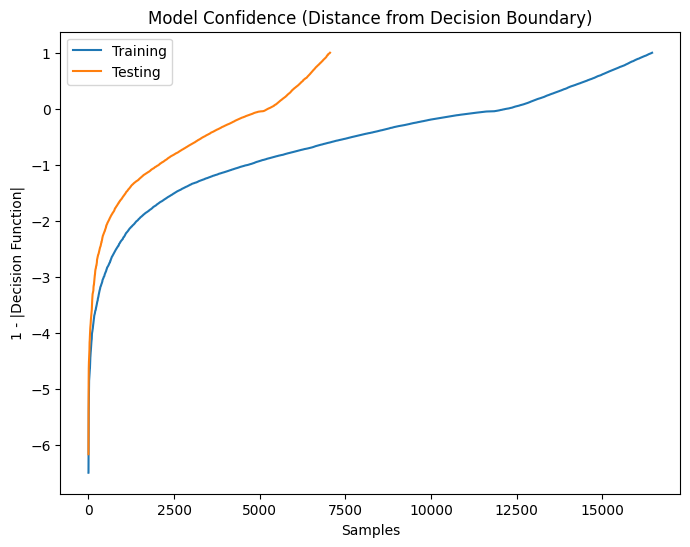

In [9]:
# Get decision function distances
train_dist = svm_model.decision_function(X_train)
test_dist = svm_model.decision_function(X_test)

# Convert to "loss" (distance from margin)
train_loss = 1 - np.abs(train_dist)
test_loss = 1 - np.abs(test_dist)

# Plot training and testing "loss"
plt.figure(figsize=(8, 6))
plt.plot(np.sort(train_loss), label='Training')
plt.plot(np.sort(test_loss), label='Testing')
plt.title('Model Confidence (Distance from Decision Boundary)')
plt.xlabel('Samples')
plt.ylabel('1 - |Decision Function|')
plt.legend()
plt.show()

# LSTM Model For Correlation

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, accuracy_score, confusion_matrix, classification_report
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout
from keras.callbacks import EarlyStopping

# Load dataset
df = pd.read_csv('crr_reduced_data.csv')

# Select features and target
features = ['co', 'no', 'no2', 'o3', 'so2', 'nh3']
target = 'aqi'

# Normalize data
scaler = MinMaxScaler()
df_scaled = pd.DataFrame(
    scaler.fit_transform(df[features + [target]]),
    columns=features + [target]
)

# Create time-series sequences
def create_sequences(data, n_steps):
    X, y = [], []
    for i in range(len(data) - n_steps):
        X.append(data[i:i+n_steps, :-1])
        y.append(data[i+n_steps, -1])
    return np.array(X), np.array(y)

n_steps = 7
X, y = create_sequences(df_scaled.values, n_steps)

# Train-test split
train_size = int(0.8 * len(X))
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# Build LSTM model
model = Sequential([
    LSTM(64, activation='relu', input_shape=(n_steps, len(features)), return_sequences=True),
    Dropout(0.2),
    LSTM(32, activation='relu'),
    Dropout(0.2),
    Dense(1)
])

model.compile(optimizer='adam', loss='mse', metrics=['mae'])

# Early stopping
early_stop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Train model
history = model.fit(
    X_train, y_train,
    epochs=10,
    batch_size=32,
    validation_split=0.2,
    callbacks=[early_stop],
    verbose=1
)

# Plot training history
plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Training History')
plt.xlabel('Epochs')
plt.ylabel('Mean Squared Error')
plt.legend()
plt.grid(True)
plt.show()

# Predictions
y_pred = model.predict(X_test)

# Inverse transform to original scale
y_test_full = np.zeros((len(y_test), len(features) + 1))
y_test_full[:, -1] = y_test
y_test_orig = scaler.inverse_transform(y_test_full)[:, -1]

y_pred_full = np.zeros((len(y_pred), len(features) + 1))
y_pred_full[:, -1] = y_pred.flatten()
y_pred_orig = scaler.inverse_transform(y_pred_full)[:, -1]

# Plot actual vs predicted AQI
plt.figure(figsize=(14, 6))
plt.plot(y_test_orig, label='Actual AQI', color='blue')
plt.plot(y_pred_orig, label='Predicted AQI', color='red', linestyle='--')
plt.title('Actual vs Predicted AQI Values')
plt.xlabel('Time Steps')
plt.ylabel('AQI')
plt.legend()
plt.grid(True)
plt.show()

# --- Regression Metrics ---
mse = mean_squared_error(y_test_orig, y_pred_orig)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test_orig, y_pred_orig)
r2 = r2_score(y_test_orig, y_pred_orig)

print("\n--- Regression Metrics ---")
print(f"MAE: {mae:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"R² Score: {r2:.4f}")

# =============================================================================
# --- START: COMPLETE CLASSIFICATION ANALYSIS ---
# =============================================================================

# Define the threshold for what is considered 'Harmful' (using 0.5 for normalized AQI)
threshold = 0.5

# Convert continuous AQI values to binary classes: 0 for 'Safe', 1 for 'Harmful'
y_test_class = (y_test_orig > threshold).astype(int)
y_pred_class = (y_pred_orig > threshold).astype(int)

# --- 1. Overall Accuracy ---
accuracy = accuracy_score(y_test_class, y_pred_class)
print(f"\n--- Overall Classification Accuracy ---")
print(f"Accuracy (at normalized AQI threshold of {threshold}): {accuracy * 100:.2f}%")

# --- 2. Confusion Matrix ---
print("\n--- Confusion Matrix ---")
cm = confusion_matrix(y_test_class, y_pred_class)
plt.figure(figsize=(6, 5))
sns.heatmap(
    cm,
    annot=True,
    fmt='d',
    cmap='Blues',
    xticklabels=['Predicted Safe', 'Predicted Harm'],
    yticklabels=['Actual Safe', 'Actual Harm']
)
plt.xlabel("Predicted Label")
plt.ylabel("Actual Label")
plt.title("Confusion Matrix")
plt.show()

# --- 3. Detailed Classification Report (Precision, Recall, F1-Score) ---
print("\n--- Detailed Classification Report ---")
# This report provides all the key ratios for both the 'Safe' and 'Harmful' classes.
report = classification_report(
    y_test_class,
    y_pred_class,
    target_names=[f'Safe (Normalized AQI <= {threshold})', f'Harmful (Normalized AQI > {threshold})']
)
print(report)

print("\n--- Interpretation of Key Ratios for 'Harmful' Class ---")
# Extracting recall for a clear explanation
# Ensure that both classes are present in y_test_class and y_pred_class before calculating recall
if cm.shape == (2, 2):
    recall = cm[1, 1] / (cm[1, 1] + cm[1, 0])
    print(f"Recall: The model successfully identified {recall:.2%} of all actually harmful days.")
    print(f"This means the model failed to issue a warning for {1-recall:.2%} of the harmful days (this is the False Negative rate).")
else:
    print("Recall for 'Harmful' class could not be calculated as only one class is present in the test data or predictions.")

# =============================================================================
# --- END: COMPLETE CLASSIFICATION ANALYSIS ---
# =============================================================================

# CNN-LSTM Model

Epoch 1/10


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


470/470 ━━━━━━━━━━━━━━━━━━━━ 9s 9ms/step - loss: 0.2020 - mae: 0.3623 - val_loss: 0.0695 - val_mae: 0.2202
Epoch 2/10
470/470 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - loss: 0.0846 - mae: 0.2388 - val_loss: 0.0413 - val_mae: 0.1436
Epoch 3/10
470/470 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - loss: 0.0697 - mae: 0.2077 - val_loss: 0.0377 - val_mae: 0.1358
Epoch 4/10
470/470 ━━━━━━━━━━━━━━━━━━━━ 6s 10ms/step - loss: 0.0650 - mae: 0.1985 - val_loss: 0.0374 - val_mae: 0.1283
Epoch 5/10
470/470 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - loss: 0.0618 - mae: 0.1915 - val_loss: 0.0354 - val_mae: 0.1221
Epoch 6/10
470/470 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - loss: 0.0604 - mae: 0.1875 - val_loss: 0.0360 - val_mae: 0.1199
Epoch 7/10
470/470 ━━━━━━━━━━━━━━━━━━━━ 6s 9ms/step - loss: 0.0576 - mae: 0.1826 - val_loss: 0.0355 - val_mae: 0.1318
Epoch 8/10
470/470 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - loss: 0.0564 - mae: 0.1805 - val_loss: 0.0346 - val_mae: 0.1209
Epoch 9/10
470/470 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - loss: 0.0540

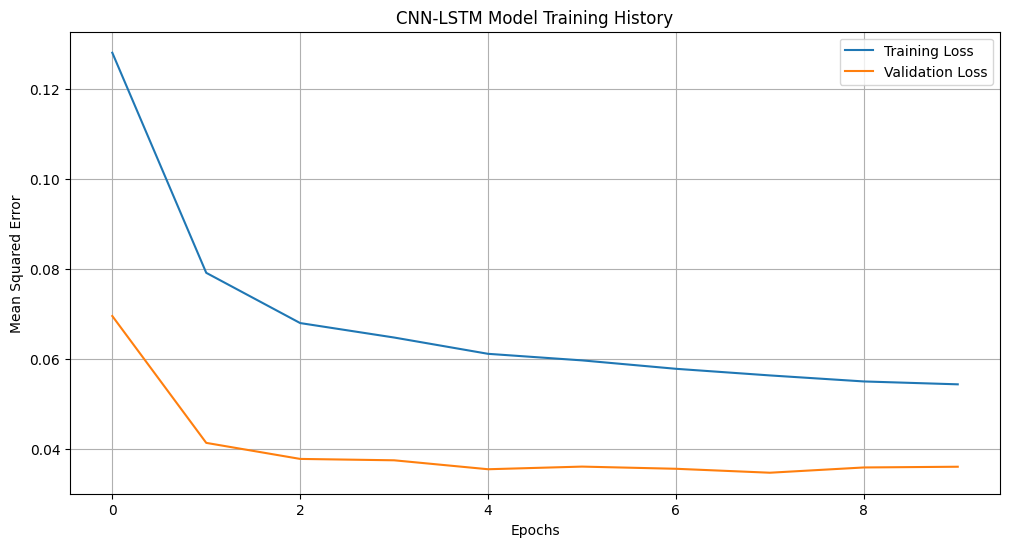

147/147 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


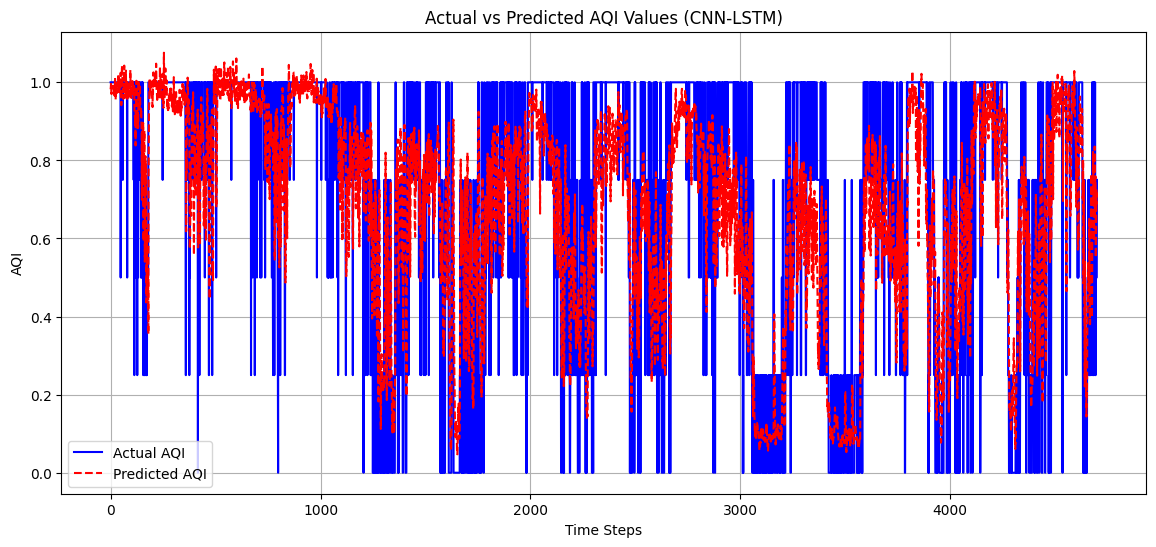


--- Regression Metrics ---
MAE: 0.18
RMSE: 0.25
R² Score: 0.5359

--- Classification Accuracy ---
Accuracy: 82.43%


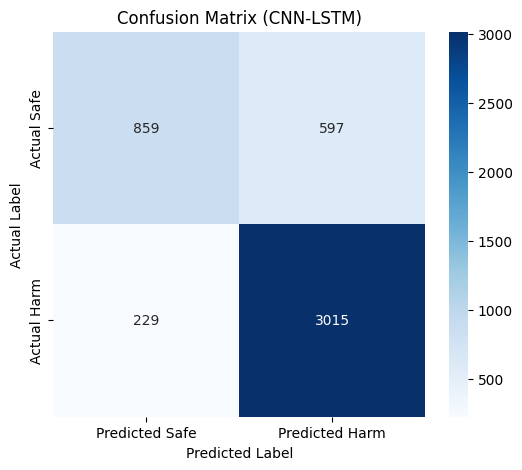


--- Detailed Classification Report ---
                     precision    recall  f1-score   support

  Safe (AQI <= 0.5)       0.79      0.59      0.68      1456
Harmful (AQI > 0.5)       0.83      0.93      0.88      3244

           accuracy                           0.82      4700
          macro avg       0.81      0.76      0.78      4700
       weighted avg       0.82      0.82      0.82      4700



In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, accuracy_score, confusion_matrix, classification_report
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout, Conv1D, MaxPooling1D
from keras.callbacks import EarlyStopping

# Load dataset
df = pd.read_csv('crr_reduced_data.csv')

# Select features and target
features = ['co','no','no2','o3','so2','nh3']
target = 'aqi'

# Normalize data
scaler = MinMaxScaler()
df_scaled = pd.DataFrame(
    scaler.fit_transform(df[features + [target]]),
    columns=features + [target]
)

# Create time-series sequences
def create_sequences(data, n_steps):
    X, y = [], []
    for i in range(len(data) - n_steps):
        X.append(data[i:i+n_steps, :-1])
        y.append(data[i+n_steps, -1])
    return np.array(X), np.array(y)

n_steps = 7
X, y = create_sequences(df_scaled.values, n_steps)

# Train-test split
train_size = int(0.8 * len(X))
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# Build CNN-LSTM model
model = Sequential([
    Conv1D(filters=64, kernel_size=2, activation='relu', input_shape=(n_steps, len(features))),
    MaxPooling1D(pool_size=2),
    LSTM(64, activation='relu', return_sequences=True),
    Dropout(0.2),
    LSTM(32, activation='relu'),
    Dropout(0.2),
    Dense(1)
])

model.compile(optimizer='adam', loss='mse', metrics=['mae'])

# Early stopping
early_stop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Train model
history = model.fit(
    X_train, y_train,
    epochs=10,
    batch_size=32,
    validation_split=0.2,
    callbacks=[early_stop],
    verbose=1
)

# Plot training history
plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('CNN-LSTM Model Training History')
plt.xlabel('Epochs')
plt.ylabel('Mean Squared Error')
plt.legend()
plt.grid(True)
plt.show()

# Predictions
y_pred = model.predict(X_test)

# Inverse transform to original scale
y_test_full = np.zeros((len(y_test), len(features) + 1))
y_test_full[:, -1] = y_test
y_test_orig = scaler.inverse_transform(y_test_full)[:, -1]

y_pred_full = np.zeros((len(y_pred), len(features) + 1))
y_pred_full[:, -1] = y_pred.flatten()
y_pred_orig = scaler.inverse_transform(y_pred_full)[:, -1]

# Plot actual vs predicted AQI
plt.figure(figsize=(14, 6))
plt.plot(y_test_orig, label='Actual AQI', color='blue')
plt.plot(y_pred_orig, label='Predicted AQI', color='red', linestyle='--')
plt.title('Actual vs Predicted AQI Values (CNN-LSTM)')
plt.xlabel('Time Steps')
plt.ylabel('AQI')
plt.legend()
plt.grid(True)
plt.show()

# --- Regression Metrics ---
mse = mean_squared_error(y_test_orig, y_pred_orig)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test_orig, y_pred_orig)
r2 = r2_score(y_test_orig, y_pred_orig)

print("\n--- Regression Metrics ---")
print(f"MAE: {mae:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"R² Score: {r2:.4f}")

# --- Classification Analysis ---
threshold = 0.5  # AQI threshold for harmful
y_test_class = (y_test_orig > threshold).astype(int)
y_pred_class = (y_pred_orig > threshold).astype(int)

accuracy = accuracy_score(y_test_class, y_pred_class)
print(f"\n--- Classification Accuracy ---")
print(f"Accuracy: {accuracy * 100:.2f}%")

# Confusion matrix
cm = confusion_matrix(y_test_class, y_pred_class)
plt.figure(figsize=(6, 5))
sns.heatmap(
    cm, annot=True, fmt='d', cmap='Blues',
    xticklabels=['Predicted Safe', 'Predicted Harm'],
    yticklabels=['Actual Safe', 'Actual Harm']
)
plt.xlabel("Predicted Label")
plt.ylabel("Actual Label")
plt.title("Confusion Matrix (CNN-LSTM)")
plt.show()

# Classification report
print("\n--- Detailed Classification Report ---")
print(classification_report(
    y_test_class, y_pred_class,
    target_names=[f'Safe (AQI <= {threshold})', f'Harmful (AQI > {threshold})']
))

# Transformer Model for Correlation

Model: "AQI_Transformer"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_1       │ (None, 7, 6)      │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_1 (Dense)     │ (None, 7, 64)     │        448 │ input_layer_1[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ positional_embeddi… │ (None, 7, 64)     │        448 │ dense_1[0][0]     │
│ (PositionalEmbeddi… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ multi_head_attenti… │ (None, 7, 64)     │     16,640 │ positional_embed… │
│ (MultiHeadAttentio… │                   │            │ positional_embed… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_3 (Dropout) │ (None, 7, 64)     │          0 │ multi_head_atten… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ add (Add)           │ (None, 7, 64)     │          0 │ positional_embed… │
│                     │                   │            │ dropout_3[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ layer_normalization │ (None, 7, 64)     │        128 │ add[0][0]         │
│ (LayerNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ sequential_1        │ (None, 7, 64)     │     16,576 │ layer_normalizat… │
│ (Sequential)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_4 (Dropout) │ (None, 7, 64)     │          0 │ sequential_1[0][… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ add_1 (Add)         │ (None, 7, 64)     │          0 │ layer_normalizat… │
│                     │                   │            │ dropout_4[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ layer_normalizatio… │ (None, 7, 64)     │        128 │ add_1[0][0]       │
│ (LayerNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ multi_head_attenti… │ (None, 7, 64)     │     16,640 │ layer_normalizat… │
│ (MultiHeadAttentio… │                   │            │ layer_normalizat… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_6 (Dropout) │ (None, 7, 64)     │          0 │ multi_head_atten… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ add_2 (Add)         │ (None, 7, 64)     │          0 │ layer_normalizat… │
│                     │                   │            │ dropout_6[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ layer_normalizatio… │ (None, 7, 64)     │        128 │ add_2[0][0]       │
│ (LayerNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ sequential_2        │ (None, 7, 64)     │     16,576 │ layer_normalizat… │
│ (Sequential)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_7 (Dropout) │ (None, 7, 64)     │          0 │ sequential_2[0][… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ add_3 (Add)         │ (None, 7, 64)     │          0 │ layer_normalizat… │
│                     │                   │            │ dropout_7[0][0]   │
├─────────────────────┼───────────────────┼────────────┼─────────────────

 Total params: 67,905 (265.25 KB)

 Trainable params: 67,905 (265.25 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
470/470 ━━━━━━━━━━━━━━━━━━━━ 19s 25ms/step - loss: 0.1841 - mae: 0.3147 - val_loss: 0.0699 - val_mae: 0.2183
Epoch 2/10
470/470 ━━━━━━━━━━━━━━━━━━━━ 20s 24ms/step - loss: 0.0680 - mae: 0.2019 - val_loss: 0.0327 - val_mae: 0.1109
Epoch 3/10
470/470 ━━━━━━━━━━━━━━━━━━━━ 20s 24ms/step - loss: 0.0606 - mae: 0.1871 - val_loss: 0.0406 - val_mae: 0.1359
Epoch 4/10
470/470 ━━━━━━━━━━━━━━━━━━━━ 11s 23ms/step - loss: 0.0591 - mae: 0.1833 - val_loss: 0.0349 - val_mae: 0.1185
Epoch 5/10
470/470 ━━━━━━━━━━━━━━━━━━━━ 21s 24ms/step - loss: 0.0571 - mae: 0.1802 - val_loss: 0.0380 - val_mae: 0.1409
Epoch 6/10
470/470 ━━━━━━━━━━━━━━━━━━━━ 21s 24ms/step - loss: 0.0544 - mae: 0.1740 - val_loss: 0.0374 - val_mae: 0.1327
Epoch 7/10
470/470 ━━━━━━━━━━━━━━━━━━━━ 20s 24ms/step - loss: 0.0554 - mae: 0.1766 - val_loss: 0.0340 - val_mae: 0.1230
Epoch 8/10
470/470 ━━━━━━━━━━━━━━━━━━━━ 21s 25ms/step - loss: 0.0535 - mae: 0.1729 - val_loss: 0.0346 - val_mae: 0.1326
Epoch 9/10
470/470 ━━━━━━━━━━━━━━━━━━━━ 

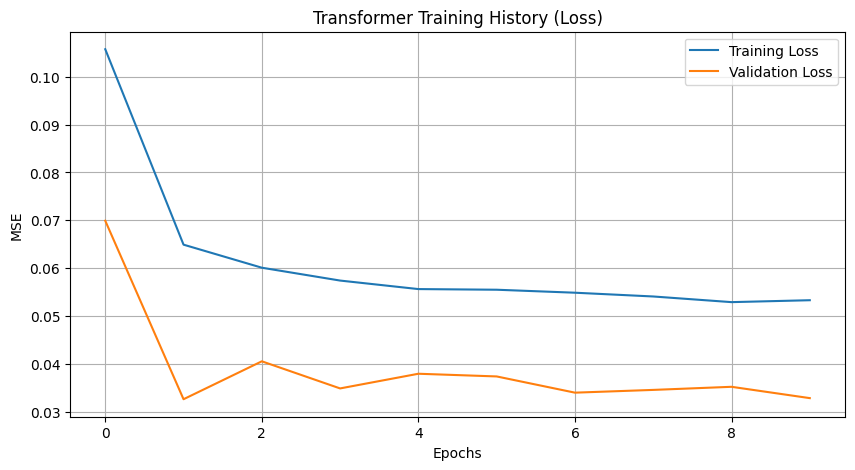

147/147 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step

--- Transformer Regression Metrics ---
MAE:  0.1773
RMSE: 0.2442
R^2:  0.5411

--- Transformer Classification Metrics ---
Accuracy:  83.19%
Precision: 0.8667
Recall:    0.8940


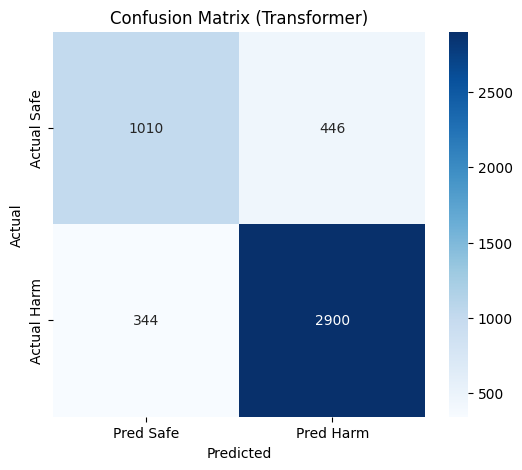

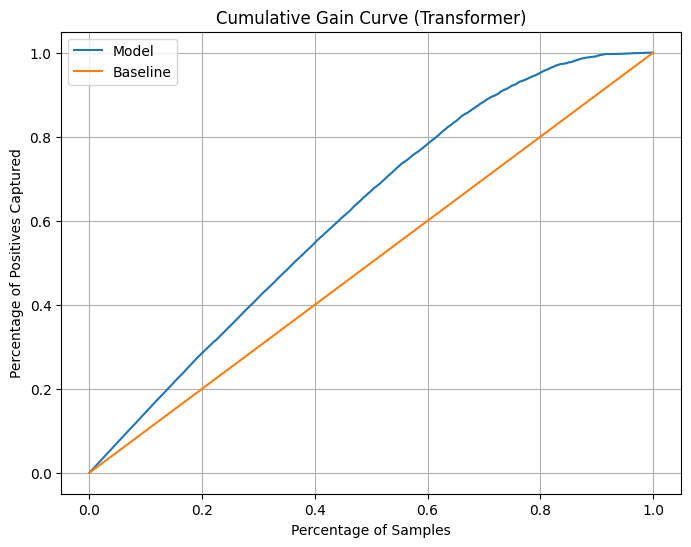

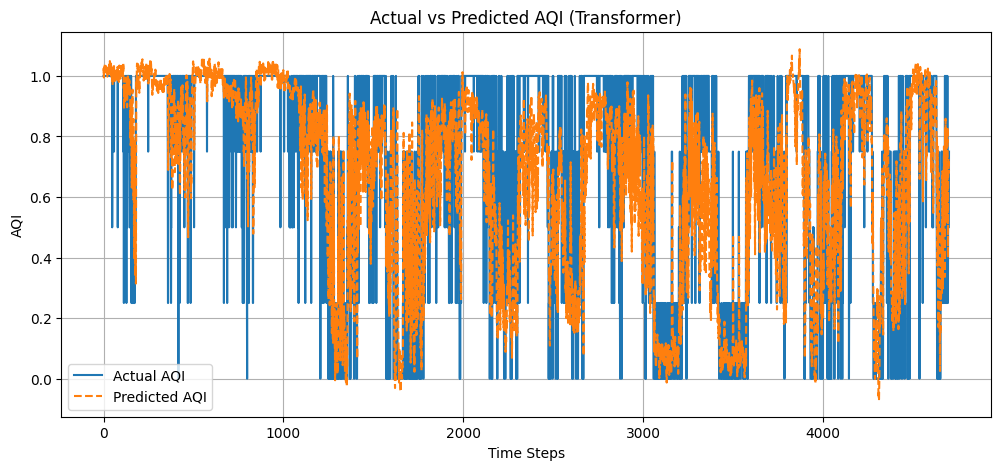

In [11]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import (
    mean_squared_error, mean_absolute_error, r2_score,
    accuracy_score, precision_score, recall_score,
    confusion_matrix, classification_report
)

import tensorflow as tf
from tensorflow.keras import layers, models, callbacks

# ---------------- Config ----------------
CSV_PATH   = "crr_reduced_data.csv"
FEATURES   = ['co', 'no', 'no2', 'o3', 'so2','nh3']
TARGET     = 'aqi'
N_STEPS    = 7
THRESHOLD  = 0.5
EPOCHS     = 20
BATCH_SIZE = 32
VAL_SPLIT  = 0.2
PATIENCE   = 10

# -------------- Data load & scale --------------
df = pd.read_csv(CSV_PATH)

scaler = MinMaxScaler()
df_scaled = pd.DataFrame(
    scaler.fit_transform(df[FEATURES + [TARGET]]),
    columns=FEATURES + [TARGET]
)

def create_sequences(data, n_steps):
    X, y = [], []
    for i in range(len(data) - n_steps):
        X.append(data[i:i+n_steps, :-1])
        y.append(data[i+n_steps, -1])
    return np.array(X), np.array(y)

X, y = create_sequences(df_scaled.values, N_STEPS)

# Train-test split (time-ordered, like your code)
train_size = int(0.8 * len(X))
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

n_features = X.shape[2]
d_model    = 64
num_heads  = 4
d_ff       = 128
dropout    = 0.1
num_layers = 2

# -------------- Positional embedding --------------
class PositionalEmbedding(layers.Layer):
    def __init__(self, maxlen, d_model):
        super().__init__()
        self.pos_emb = self.add_weight(
            name="pos_emb", shape=(1, maxlen, d_model),
            initializer="random_normal", trainable=True
        )
    def call(self, x):
        # x: (batch, time, d_model)
        return x + self.pos_emb[:, :tf.shape(x)[1], :]

# -------------- Transformer block --------------
def transformer_block(x, d_model, num_heads, d_ff, dropout):
    # Multi-Head Self Attention
    attn_out = layers.MultiHeadAttention(num_heads=num_heads, key_dim=d_model//num_heads)(x, x)
    x = layers.Add()([x, layers.Dropout(dropout)(attn_out)])
    x = layers.LayerNormalization(epsilon=1e-6)(x)
    # Feed Forward
    ffn = models.Sequential([
        layers.Dense(d_ff, activation="gelu"),
        layers.Dense(d_model),
    ])
    ffn_out = ffn(x)
    x = layers.Add()([x, layers.Dropout(dropout)(ffn_out)])
    x = layers.LayerNormalization(epsilon=1e-6)(x)
    return x

# -------------- Build model --------------
inp = layers.Input(shape=(N_STEPS, n_features))
# Project per-timestep feature vector to d_model
x = layers.Dense(d_model)(inp)
# Add learnable positional embedding
x = PositionalEmbedding(N_STEPS, d_model)(x)
# Stack Transformer encoder layers
for _ in range(num_layers):
    x = transformer_block(x, d_model, num_heads, d_ff, dropout)
# Pool over time
x = layers.GlobalAveragePooling1D()(x)
x = layers.Dropout(dropout)(x)
out = layers.Dense(1)(x)  # regression to normalized AQI

model = models.Model(inp, out, name="AQI_Transformer")
model.compile(optimizer="adam", loss="mse", metrics=["mae"])
model.summary()

early_stop = callbacks.EarlyStopping(monitor="val_loss", patience=PATIENCE, restore_best_weights=True)

# -------------- Train --------------
history = model.fit(
    X_train, y_train,
    epochs=10,
    batch_size=BATCH_SIZE,
    validation_split=VAL_SPLIT,
    callbacks=[early_stop],
    verbose=1
)

# -------------- Plot: training history (loss) --------------
plt.figure(figsize=(10, 5))
plt.plot(history.history["loss"], label="Training Loss")
plt.plot(history.history["val_loss"], label="Validation Loss")
plt.xlabel("Epochs"); plt.ylabel("MSE"); plt.title("Transformer Training History (Loss)")
plt.legend(); plt.grid(True)
plt.show()

# -------------- Predict & inverse-transform to original scale --------------
y_pred = model.predict(X_test).flatten()

# prepare arrays for inverse scaling (target is last column)
def inverse_target_only(scaled_target):
    z = np.zeros((len(scaled_target), len(FEATURES) + 1))
    z[:, -1] = scaled_target
    return scaler.inverse_transform(z)[:, -1]

y_test_orig = inverse_target_only(y_test)
y_pred_orig = inverse_target_only(y_pred)

# -------------- Regression metrics --------------
mse  = mean_squared_error(y_test_orig, y_pred_orig)
rmse = np.sqrt(mse)
mae  = mean_absolute_error(y_test_orig, y_pred_orig)
r2   = r2_score(y_test_orig, y_pred_orig)

print("\n--- Transformer Regression Metrics ---")
print(f"MAE:  {mae:.4f}")
print(f"RMSE: {rmse:.4f}")
print(f"R^2:  {r2:.4f}")

# -------------- Classification metrics (threshold on ORIGINAL scale) --------------
y_test_cls = (y_test_orig > THRESHOLD).astype(int)
y_pred_cls = (y_pred_orig > THRESHOLD).astype(int)

acc  = accuracy_score(y_test_cls, y_pred_cls)
prec = precision_score(y_test_cls, y_pred_cls, zero_division=0)
rec  = recall_score(y_test_cls, y_pred_cls, zero_division=0)

print("\n--- Transformer Classification Metrics ---")
print(f"Accuracy:  {acc*100:.2f}%")
print(f"Precision: {prec:.4f}")
print(f"Recall:    {rec:.4f}")

# Confusion matrix
cm = confusion_matrix(y_test_cls, y_pred_cls)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=["Pred Safe", "Pred Harm"],
            yticklabels=["Actual Safe", "Actual Harm"])
plt.xlabel("Predicted"); plt.ylabel("Actual"); plt.title("Confusion Matrix (Transformer)")
plt.show()

# -------------- Cumulative Gain Curve --------------
# Use predicted AQI as a risk score (higher AQI => more likely 'harmful')
order = np.argsort(-y_pred_orig)  # descending by predicted AQI
y_true_sorted = y_test_cls[order]
cum_positives = np.cumsum(y_true_sorted == 1)
total_positives = (y_test_cls == 1).sum()
n = len(y_true_sorted)
perc_samples = np.arange(1, n+1) / n
gain = cum_positives / max(total_positives, 1)

plt.figure(figsize=(8, 6))
plt.plot(perc_samples, gain, label="Model")
plt.plot(perc_samples, perc_samples, label="Baseline")
plt.xlabel("Percentage of Samples")
plt.ylabel("Percentage of Positives Captured")
plt.title("Cumulative Gain Curve (Transformer)")
plt.legend(); plt.grid(True)
plt.show()

# -------------- Actual vs Predicted plot --------------
plt.figure(figsize=(12, 5))
plt.plot(y_test_orig, label="Actual AQI")
plt.plot(y_pred_orig, label="Predicted AQI", linestyle="--")
plt.xlabel("Time Steps"); plt.ylabel("AQI")
plt.title("Actual vs Predicted AQI (Transformer)")
plt.legend(); plt.grid(True)
plt.show()

# Ranking Based **Featured**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor

# Remove non-numeric columns (assuming they exist)
if 'city' in df_normalized.columns:
    df_normalized = df_normalized.drop('city', axis=1)
if 'date' in df_normalized.columns:
    df_normalized = df_normalized.drop('date', axis=1)

# Calculate correlation matrix with AQI
corr_matrix = df_normalized.corr()
aqi_correlation = corr_matrix['aqi'].sort_values(ascending=False)

# Plot correlation with AQI
plt.figure(figsize=(8, 10))
aqi_correlation.drop('aqi').plot(kind='barh', color='teal')
plt.title('Correlation with AQI', fontsize=14)
plt.xlabel('Correlation Coefficient', fontsize=12)
plt.ylabel('Features', fontsize=12)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# Feature importance using Random Forest
X = df_normalized.drop('aqi', axis=1)
y = df_normalized['aqi']

model = RandomForestRegressor(random_state=42, n_estimators=100)
model.fit(X, y)

# Get feature importances
importances = model.feature_importances_
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': importances
}).sort_values('Importance', ascending=False)

# Plot feature importance
plt.figure(figsize=(10, 6))
plt.barh(feature_importance['Feature'], feature_importance['Importance'], color='darkorange')
plt.title('Feature Importance Ranking', fontsize=14)
plt.xlabel('Relative Importance', fontsize=12)
plt.ylabel('Features', fontsize=12)
plt.gca().invert_yaxis()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

print("Feature Importance Ranking:")
print(feature_importance)

In [ ]:
# Select top 3 most important features (excluding target)
important_features = feature_importance.head(5)['Feature'].tolist()

# Make sure aqi is included
if 'aqi' not in important_features:
    important_features.append('aqi')

# Create reduced dataset
df_reduced_pr = df_normalized[important_features].copy()

print("\nSelected Features:", important_features)
print("Reduced dataset shape:", df_reduced_pr.shape)
print("\nFirst 5 rows of reduced dataset:")
print(df_reduced_pr.head())

df_reduced_pr.to_csv('pr_reduced_data.csv', index=False)

# **SVM**

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc
import matplotlib.pyplot as plt
from sklearn.preprocessing import label_binarize

# Load the dataset
data = pd.read_csv('pr_reduced_data.csv')

# Convert AQI to binary classification (good/bad)
# Assuming: good (0) = AQI ≤ 100, bad (1) = AQI > 100
data['air_quality'] = np.where(data['aqi'] <= 0.5, 0, 1)  # Since normalized 0-1, 0.5 represents 100 AQI

# Features and target
X = data[['pm2_5', 'pm10', 'nh3', 'o3', 'so2']]
y = data['air_quality']

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


# Initialize SVM classifier
svm_model = SVC(kernel='rbf', C=1.0, gamma='scale', probability=True, random_state=42)

# Train the model
svm_model.fit(X_train, y_train)

# Predictions
y_pred = svm_model.predict(X_test)
y_prob = svm_model.predict_proba(X_test)[:, 1]  # Probabilities for ROC curve

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

# Classification Report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

plt.figure(figsize=(8, 6))
plt.imshow(conf_matrix, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
tick_marks = np.arange(2)
plt.xticks(tick_marks, ['Good', 'Bad'], rotation=45)
plt.yticks(tick_marks, ['Good', 'Bad'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')

# Add text annotations
thresh = conf_matrix.max() / 2.
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        plt.text(j, i, format(conf_matrix[i, j], 'd'),
                 horizontalalignment="center",
                 color="white" if conf_matrix[i, j] > thresh else "black")

plt.tight_layout()
plt.show()



In [ ]:
from sklearn.metrics import RocCurveDisplay, roc_curve, auc

# Create enhanced ROC curve plot
plt.figure(figsize=(10, 8))

# Plot ROC curve with more details
roc_display = RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc,
                             estimator_name='SVM Classifier')
roc_display.plot(ax=plt.gca(), color='darkorange', lw=3)

# Add important thresholds points
optimal_idx = np.argmax(tpr-fpr)
optimal_threshold = thresholds[optimal_idx]
plt.scatter(fpr[optimal_idx], tpr[optimal_idx], marker='o', color='red',
            label=f'Optimal Threshold (={optimal_threshold:.2f})')

# Add iso-f1 curves
x = np.linspace(0, 1, 100)
for f_score in [0.2, 0.4, 0.6, 0.8]:
    y = f_score * x / (2 * x - f_score)
    plt.plot(x[y >= 0], y[y >= 0], color='gray', alpha=0.2, linestyle='--')
    plt.annotate(f'f1={f_score:.1f}', xy=(0.9, y[45] + 0.02), alpha=0.5)

# Add diagonal and decorate
plt.plot([0, 1], [0, 1], color='navy', lw=1, linestyle='--', label='Random Classifier')
plt.xlim([-0.01, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (1 - Specificity)', fontsize=12)
plt.ylabel('True Positive Rate (Sensitivity)', fontsize=12)
plt.title('Enhanced ROC Curve Analysis\nSVM for Air Quality Prediction', fontsize=14, pad=20)
plt.legend(loc="lower right", fontsize=10)
plt.grid(True, alpha=0.3)

# Add performance metrics box
metrics_text = (f'AUC = {roc_auc:.3f}\n'
                f'Optimal Threshold = {optimal_threshold:.3f}\n'
                f'Sensitivity = {tpr[optimal_idx]:.2f}\n'
                f'Specificity = {1-fpr[optimal_idx]:.2f}')
plt.text(0.6, 0.2, metrics_text, bbox=dict(facecolor='white', alpha=0.8),
         fontsize=10)

plt.tight_layout()
plt.show()

# LSTM Model

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, accuracy_score, confusion_matrix, classification_report
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout
from keras.callbacks import EarlyStopping

# Load dataset
df = pd.read_csv('pr_reduced_data.csv')

# Select features and target
features = ['pm2_5', 'pm10', 'nh3', 'o3', 'so2']
target = 'aqi'

# Normalize data
scaler = MinMaxScaler()
df_scaled = pd.DataFrame(
    scaler.fit_transform(df[features + [target]]),
    columns=features + [target]
)

# Create time-series sequences
def create_sequences(data, n_steps):
    X, y = [], []
    for i in range(len(data) - n_steps):
        X.append(data[i:i+n_steps, :-1])
        y.append(data[i+n_steps, -1])
    return np.array(X), np.array(y)

n_steps = 7
X, y = create_sequences(df_scaled.values, n_steps)

# Train-test split
train_size = int(0.8 * len(X))
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# Build LSTM model
model = Sequential([
    LSTM(64, activation='relu', input_shape=(n_steps, len(features)), return_sequences=True),
    Dropout(0.2),
    LSTM(32, activation='relu'),
    Dropout(0.2),
    Dense(1)
])

model.compile(optimizer='adam', loss='mse', metrics=['mae'])

# Early stopping
early_stop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Train model
history = model.fit(
    X_train, y_train,
    epochs=10,
    batch_size=32,
    validation_split=0.2,
    callbacks=[early_stop],
    verbose=1
)

# Plot training history
plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Training History')
plt.xlabel('Epochs')
plt.ylabel('Mean Squared Error')
plt.legend()
plt.grid(True)
plt.show()

# Predictions
y_pred = model.predict(X_test)

# Inverse transform to original scale
y_test_full = np.zeros((len(y_test), len(features) + 1))
y_test_full[:, -1] = y_test
y_test_orig = scaler.inverse_transform(y_test_full)[:, -1]

y_pred_full = np.zeros((len(y_pred), len(features) + 1))
y_pred_full[:, -1] = y_pred.flatten()
y_pred_orig = scaler.inverse_transform(y_pred_full)[:, -1]

# Plot actual vs predicted AQI
plt.figure(figsize=(14, 6))
plt.plot(y_test_orig, label='Actual AQI', color='blue')
plt.plot(y_pred_orig, label='Predicted AQI', color='red', linestyle='--')
plt.title('Actual vs Predicted AQI Values')
plt.xlabel('Time Steps')
plt.ylabel('AQI')
plt.legend()
plt.grid(True)
plt.show()

# --- Regression Metrics ---
mse = mean_squared_error(y_test_orig, y_pred_orig)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test_orig, y_pred_orig)
r2 = r2_score(y_test_orig, y_pred_orig)

print("\n--- Regression Metrics ---")
print(f"MAE: {mae:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"R² Score: {r2:.4f}")

# Define the threshold for what is considered 'Harmful' (using 0.5 for normalized AQI)
threshold = 0.5

# Convert continuous AQI values to binary classes: 0 for 'Safe', 1 for 'Harmful'
y_test_class = (y_test_orig > threshold).astype(int)
y_pred_class = (y_pred_orig > threshold).astype(int)

# --- 1. Overall Accuracy ---
accuracy = accuracy_score(y_test_class, y_pred_class)
print(f"\n--- Overall Classification Accuracy ---")
print(f"Accuracy (at normalized AQI threshold of {threshold}): {accuracy * 100:.2f}%")

# --- 2. Confusion Matrix ---
print("\n--- Confusion Matrix ---")
cm = confusion_matrix(y_test_class, y_pred_class)
plt.figure(figsize=(6, 5))
sns.heatmap(
    cm,
    annot=True,
    fmt='d',
    cmap='Blues',
    xticklabels=['Predicted Safe', 'Predicted Harm'],
    yticklabels=['Actual Safe', 'Actual Harm']
)
plt.xlabel("Predicted Label")
plt.ylabel("Actual Label")
plt.title("Confusion Matrix")
plt.show()

# --- 3. Detailed Classification Report (Precision, Recall, F1-Score) ---
print("\n--- Detailed Classification Report ---")
# This report provides all the key ratios for both the 'Safe' and 'Harmful' classes.
report = classification_report(
    y_test_class,
    y_pred_class,
    target_names=[f'Safe (Normalized AQI <= {threshold})', f'Harmful (Normalized AQI > {threshold})']
)
print(report)

print("\n--- Interpretation of Key Ratios for 'Harmful' Class ---")
# Extracting recall for a clear explanation
# Ensure that both classes are present in y_test_class and y_pred_class before calculating recall
if cm.shape == (2, 2):
    recall = cm[1, 1] / (cm[1, 1] + cm[1, 0])
    print(f"Recall: The model successfully identified {recall:.2%} of all actually harmful days.")
    print(f"This means the model failed to issue a warning for {1-recall:.2%} of the harmful days (this is the False Negative rate).")
else:
    print("Recall for 'Harmful' class could not be calculated as only one class is present in the test data or predictions.")


# CNN-LSTM Models

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, accuracy_score, confusion_matrix, classification_report
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout, Conv1D, MaxPooling1D
from keras.callbacks import EarlyStopping

# Load dataset
df = pd.read_csv('pr_reduced_data.csv')

# Select features and target
features = ['pm2_5', 'pm10', 'nh3', 'o3', 'so2']
target = 'aqi'

# Normalize data
scaler = MinMaxScaler()
df_scaled = pd.DataFrame(
    scaler.fit_transform(df[features + [target]]),
    columns=features + [target]
)

# Create time-series sequences
def create_sequences(data, n_steps):
    X, y = [], []
    for i in range(len(data) - n_steps):
        X.append(data[i:i+n_steps, :-1])
        y.append(data[i+n_steps, -1])
    return np.array(X), np.array(y)

n_steps = 7
X, y = create_sequences(df_scaled.values, n_steps)

# Train-test split
train_size = int(0.8 * len(X))
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# Build CNN-LSTM model
model = Sequential([
    Conv1D(filters=64, kernel_size=2, activation='relu', input_shape=(n_steps, len(features))),
    MaxPooling1D(pool_size=2),
    LSTM(64, activation='relu', return_sequences=True),
    Dropout(0.2),
    LSTM(32, activation='relu'),
    Dropout(0.2),
    Dense(1)
])

model.compile(optimizer='adam', loss='mse', metrics=['mae'])

# Early stopping
early_stop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Train model
history = model.fit(
    X_train, y_train,
    epochs=10,
    batch_size=32,
    validation_split=0.2,
    callbacks=[early_stop],
    verbose=1
)

# Plot training history
plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('CNN-LSTM Model Training History')
plt.xlabel('Epochs')
plt.ylabel('Mean Squared Error')
plt.legend()
plt.grid(True)
plt.show()

# Predictions
y_pred = model.predict(X_test)

# Inverse transform to original scale
y_test_full = np.zeros((len(y_test), len(features) + 1))
y_test_full[:, -1] = y_test
y_test_orig = scaler.inverse_transform(y_test_full)[:, -1]

y_pred_full = np.zeros((len(y_pred), len(features) + 1))
y_pred_full[:, -1] = y_pred.flatten()
y_pred_orig = scaler.inverse_transform(y_pred_full)[:, -1]

# Plot actual vs predicted AQI
plt.figure(figsize=(14, 6))
plt.plot(y_test_orig, label='Actual AQI', color='blue')
plt.plot(y_pred_orig, label='Predicted AQI', color='red', linestyle='--')
plt.title('Actual vs Predicted AQI Values (CNN-LSTM)')
plt.xlabel('Time Steps')
plt.ylabel('AQI')
plt.legend()
plt.grid(True)
plt.show()

# --- Regression Metrics ---
mse = mean_squared_error(y_test_orig, y_pred_orig)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test_orig, y_pred_orig)
r2 = r2_score(y_test_orig, y_pred_orig)

print("\n--- Regression Metrics ---")
print(f"MAE: {mae:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"R² Score: {r2:.4f}")

# --- Classification Analysis ---
threshold = 0.5  # AQI threshold for harmful
y_test_class = (y_test_orig > threshold).astype(int)
y_pred_class = (y_pred_orig > threshold).astype(int)

accuracy = accuracy_score(y_test_class, y_pred_class)
print(f"\n--- Classification Accuracy ---")
print(f"Accuracy: {accuracy * 100:.2f}%")

# Confusion matrix
cm = confusion_matrix(y_test_class, y_pred_class)
plt.figure(figsize=(6, 5))
sns.heatmap(
    cm, annot=True, fmt='d', cmap='Blues',
    xticklabels=['Predicted Safe', 'Predicted Harm'],
    yticklabels=['Actual Safe', 'Actual Harm']
)
plt.xlabel("Predicted Label")
plt.ylabel("Actual Label")
plt.title("Confusion Matrix (CNN-LSTM)")
plt.show()

# Classification report
print("\n--- Detailed Classification Report ---")
print(classification_report(
    y_test_class, y_pred_class,
    target_names=[f'Safe (AQI <= {threshold})', f'Harmful (AQI > {threshold})']
))

# Transformer Model for Importance ranking

In [ ]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import (
    mean_squared_error, mean_absolute_error, r2_score,
    accuracy_score, precision_score, recall_score,
    confusion_matrix, classification_report
)

import tensorflow as tf
from tensorflow.keras import layers, models, callbacks

# ---------------- Config ----------------
CSV_PATH   = "pr_reduced_data.csv"
FEATURES   = ['pm2_5', 'pm10', 'nh3', 'o3', 'so2']
TARGET     = 'aqi'
N_STEPS    = 7
THRESHOLD  = 0.5
EPOCHS     = 20
BATCH_SIZE = 32
VAL_SPLIT  = 0.2
PATIENCE   = 10

# -------------- Data load & scale --------------
df = pd.read_csv(CSV_PATH)

scaler = MinMaxScaler()
df_scaled = pd.DataFrame(
    scaler.fit_transform(df[FEATURES + [TARGET]]),
    columns=FEATURES + [TARGET]
)

def create_sequences(data, n_steps):
    X, y = [], []
    for i in range(len(data) - n_steps):
        X.append(data[i:i+n_steps, :-1])
        y.append(data[i+n_steps, -1])
    return np.array(X), np.array(y)

X, y = create_sequences(df_scaled.values, N_STEPS)

# Train-test split (time-ordered, like your code)
train_size = int(0.8 * len(X))
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

n_features = X.shape[2]
d_model    = 64
num_heads  = 4
d_ff       = 128
dropout    = 0.1
num_layers = 2

# -------------- Positional embedding --------------
class PositionalEmbedding(layers.Layer):
    def __init__(self, maxlen, d_model):
        super().__init__()
        self.pos_emb = self.add_weight(
            name="pos_emb", shape=(1, maxlen, d_model),
            initializer="random_normal", trainable=True
        )
    def call(self, x):
        # x: (batch, time, d_model)
        return x + self.pos_emb[:, :tf.shape(x)[1], :]

# -------------- Transformer block --------------
def transformer_block(x, d_model, num_heads, d_ff, dropout):
    # Multi-Head Self Attention
    attn_out = layers.MultiHeadAttention(num_heads=num_heads, key_dim=d_model//num_heads)(x, x)
    x = layers.Add()([x, layers.Dropout(dropout)(attn_out)])
    x = layers.LayerNormalization(epsilon=1e-6)(x)
    # Feed Forward
    ffn = models.Sequential([
        layers.Dense(d_ff, activation="gelu"),
        layers.Dense(d_model),
    ])
    ffn_out = ffn(x)
    x = layers.Add()([x, layers.Dropout(dropout)(ffn_out)])
    x = layers.LayerNormalization(epsilon=1e-6)(x)
    return x

# -------------- Build model --------------
inp = layers.Input(shape=(N_STEPS, n_features))
# Project per-timestep feature vector to d_model
x = layers.Dense(d_model)(inp)
# Add learnable positional embedding
x = PositionalEmbedding(N_STEPS, d_model)(x)
# Stack Transformer encoder layers
for _ in range(num_layers):
    x = transformer_block(x, d_model, num_heads, d_ff, dropout)
# Pool over time
x = layers.GlobalAveragePooling1D()(x)
x = layers.Dropout(dropout)(x)
out = layers.Dense(1)(x)  # regression to normalized AQI

model = models.Model(inp, out, name="AQI_Transformer")
model.compile(optimizer="adam", loss="mse", metrics=["mae"])
model.summary()

early_stop = callbacks.EarlyStopping(monitor="val_loss", patience=PATIENCE, restore_best_weights=True)

# -------------- Train --------------
history = model.fit(
    X_train, y_train,
    epochs=10,
    batch_size=BATCH_SIZE,
    validation_split=VAL_SPLIT,
    callbacks=[early_stop],
    verbose=1
)

# -------------- Plot: training history (loss) --------------
plt.figure(figsize=(10, 5))
plt.plot(history.history["loss"], label="Training Loss")
plt.plot(history.history["val_loss"], label="Validation Loss")
plt.xlabel("Epochs"); plt.ylabel("MSE"); plt.title("Transformer Training History (Loss)")
plt.legend(); plt.grid(True)
plt.show()

# -------------- Predict & inverse-transform to original scale --------------
y_pred = model.predict(X_test).flatten()

# prepare arrays for inverse scaling (target is last column)
def inverse_target_only(scaled_target):
    z = np.zeros((len(scaled_target), len(FEATURES) + 1))
    z[:, -1] = scaled_target
    return scaler.inverse_transform(z)[:, -1]

y_test_orig = inverse_target_only(y_test)
y_pred_orig = inverse_target_only(y_pred)

# -------------- Regression metrics --------------
mse  = mean_squared_error(y_test_orig, y_pred_orig)
rmse = np.sqrt(mse)
mae  = mean_absolute_error(y_test_orig, y_pred_orig)
r2   = r2_score(y_test_orig, y_pred_orig)

print("\n--- Transformer Regression Metrics ---")
print(f"MAE:  {mae:.4f}")
print(f"RMSE: {rmse:.4f}")
print(f"R^2:  {r2:.4f}")

# -------------- Classification metrics (threshold on ORIGINAL scale) --------------
y_test_cls = (y_test_orig > THRESHOLD).astype(int)
y_pred_cls = (y_pred_orig > THRESHOLD).astype(int)

acc  = accuracy_score(y_test_cls, y_pred_cls)
prec = precision_score(y_test_cls, y_pred_cls, zero_division=0)
rec  = recall_score(y_test_cls, y_pred_cls, zero_division=0)

print("\n--- Transformer Classification Metrics ---")
print(f"Accuracy:  {acc*100:.2f}%")
print(f"Precision: {prec:.4f}")
print(f"Recall:    {rec:.4f}")

# Confusion matrix
cm = confusion_matrix(y_test_cls, y_pred_cls)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=["Pred Safe", "Pred Harm"],
            yticklabels=["Actual Safe", "Actual Harm"])
plt.xlabel("Predicted"); plt.ylabel("Actual"); plt.title("Confusion Matrix (Transformer)")
plt.show()

# -------------- Cumulative Gain Curve --------------
# Use predicted AQI as a risk score (higher AQI => more likely 'harmful')
order = np.argsort(-y_pred_orig)  # descending by predicted AQI
y_true_sorted = y_test_cls[order]
cum_positives = np.cumsum(y_true_sorted == 1)
total_positives = (y_test_cls == 1).sum()
n = len(y_true_sorted)
perc_samples = np.arange(1, n+1) / n
gain = cum_positives / max(total_positives, 1)

plt.figure(figsize=(8, 6))
plt.plot(perc_samples, gain, label="Model")
plt.plot(perc_samples, perc_samples, label="Baseline")
plt.xlabel("Percentage of Samples")
plt.ylabel("Percentage of Positives Captured")
plt.title("Cumulative Gain Curve (Transformer)")
plt.legend(); plt.grid(True)
plt.show()

# -------------- Actual vs Predicted plot --------------
plt.figure(figsize=(12, 5))
plt.plot(y_test_orig, label="Actual AQI")
plt.plot(y_pred_orig, label="Predicted AQI", linestyle="--")
plt.xlabel("Time Steps"); plt.ylabel("AQI")
plt.title("Actual vs Predicted AQI (Transformer)")
plt.legend(); plt.grid(True)
plt.show()

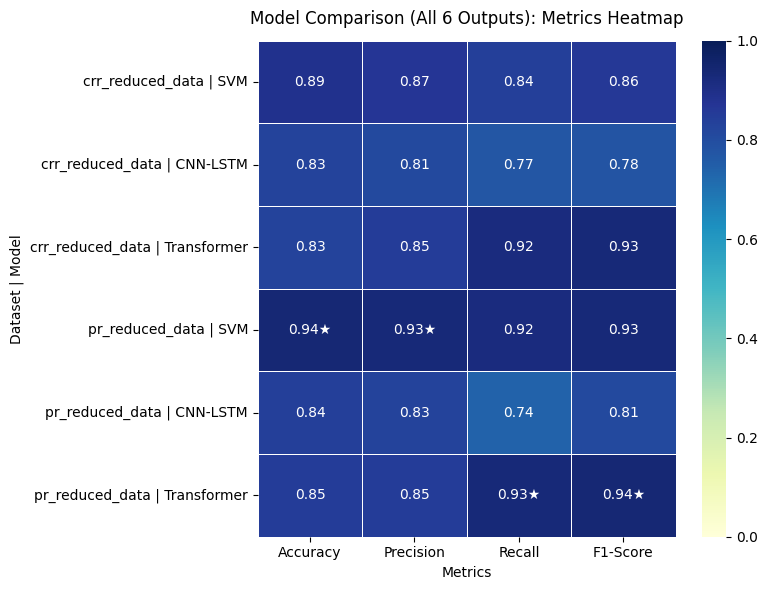

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# --- Your results table (keep as-is, or replace values) ---
df_results = pd.DataFrame([
    {"Dataset": "crr_reduced_data", "Model": "SVM",         "Accuracy": 0.89, "Precision": 0.87, "Recall": 0.84, "F1-Score": 0.86},
    {"Dataset": "crr_reduced_data", "Model": "CNN-LSTM",    "Accuracy": 0.83, "Precision": 0.81, "Recall": 0.77, "F1-Score": 0.78},
    {"Dataset": "crr_reduced_data", "Model": "Transformer", "Accuracy": 0.83, "Precision": 0.85, "Recall": 0.92, "F1-Score": 0.93},
    {"Dataset": "pr_reduced_data",  "Model": "SVM",         "Accuracy": 0.94, "Precision": 0.93, "Recall": 0.92, "F1-Score": 0.93},
    {"Dataset": "pr_reduced_data",  "Model": "CNN-LSTM",    "Accuracy": 0.84, "Precision": 0.83, "Recall": 0.74, "F1-Score": 0.81},
    {"Dataset": "pr_reduced_data",  "Model": "Transformer", "Accuracy": 0.85, "Precision": 0.85, "Recall": 0.93, "F1-Score": 0.94},
])

# --- Build a single heatmap matrix: rows = "Dataset | Model", cols = metrics ---
metrics = ["Accuracy", "Precision", "Recall", "F1-Score"]
model_order = ["SVM", "CNN-LSTM", "Transformer"]
dataset_order = ["crr_reduced_data", "pr_reduced_data"]  # change if you prefer other order

df = df_results.copy()
df["Model"] = pd.Categorical(df["Model"], categories=model_order, ordered=True)
df["Dataset"] = pd.Categorical(df["Dataset"], categories=dataset_order, ordered=True)
df = df.sort_values(["Dataset", "Model"])
df["Row"] = df["Dataset"].astype(str) + " | " + df["Model"].astype(str)

mat = df.set_index("Row")[metrics].astype(float)

# --- Annotation text with ★ on the best per metric (across all 6 rows) ---
annot_text = mat.copy()
for col in metrics:
    max_val = annot_text[col].max()
    best_mask = np.isclose(annot_text[col].values, max_val)
    annot_text[col] = annot_text[col].map(lambda x: f"{x:.2f}")
    annot_text.loc[best_mask, col] = annot_text.loc[best_mask, col] + "★"

# --- Plot single heatmap ---
plt.figure(figsize=(8, 6))  # adjust size if you want bigger
ax = sns.heatmap(
    mat, annot=annot_text.values, fmt="", cmap="YlGnBu",
    vmin=0, vmax=1, linewidths=0.5, linecolor="white",
    cbar=True
)
ax.set_title("Model Comparison (All 6 Outputs): Metrics Heatmap", pad=12)
ax.set_xlabel("Metrics")
ax.set_ylabel("Dataset | Model")
plt.tight_layout()
plt.show()
